In [1]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.misc import imsave



In [2]:
PATH_TEST_H5 = "/mnt/dfs/xjyan/patches/269_test_patch_0.h5"
PATH_OUTPUT_H5 = "/mnt/dfs/xjyan/269-deeplevelset-segmentation/experiments/269_unet1/test/unet1_3_9_predictions.h5"

In [3]:
h5_test = h5py.File(PATH_TEST_H5, 'r')
h5_output = h5py.File(PATH_OUTPUT_H5, 'r')

In [4]:
l_all_pid = list(h5_test.keys())

In [5]:
len(l_all_pid)

23223

# show prediction

In [8]:
def nmlz(a):
    mi = np.min(a)
    ma = np.max(a)
    return (a - mi)/(ma -mi)

def overlap_pmaps(p1, p2):
    rgb = np.zeros((512, 512, 3))
    rgb[:,:,0] = p1
    rgb[:,:,1] = p2
    return rgb

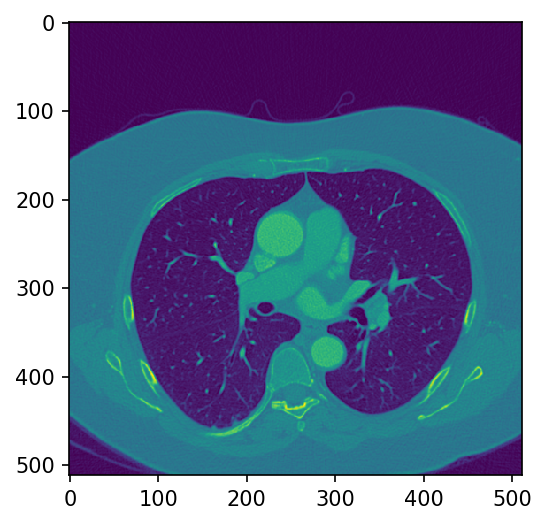

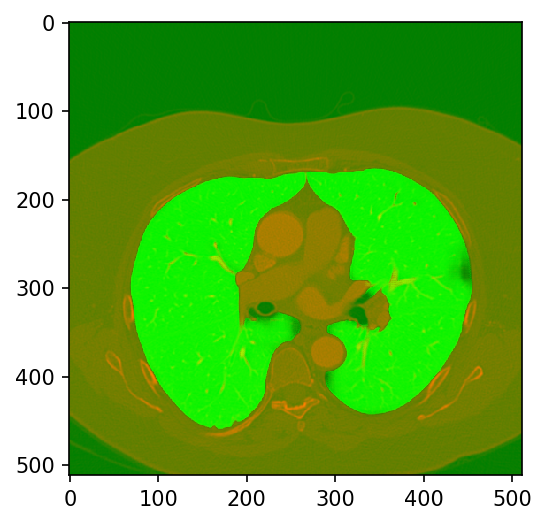

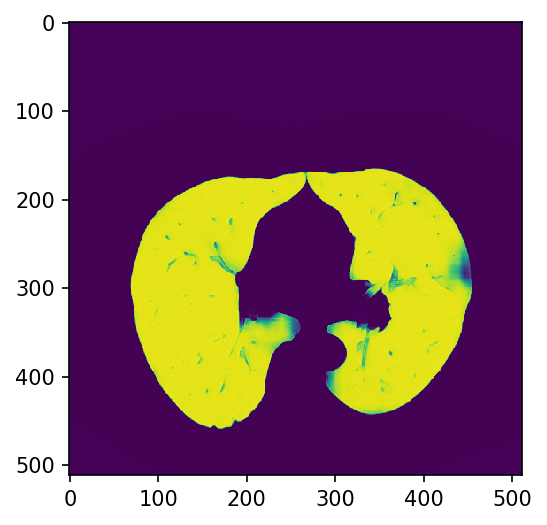

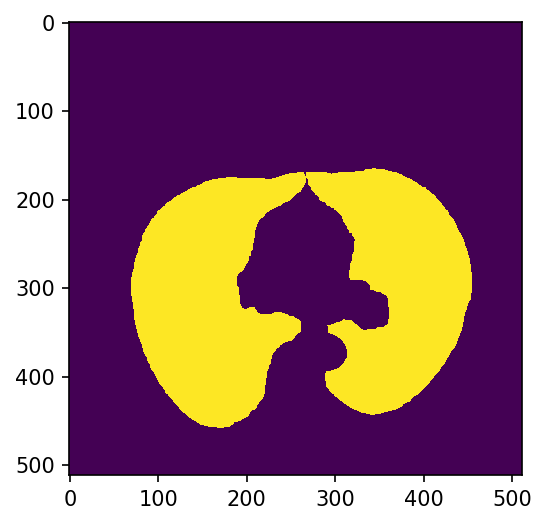

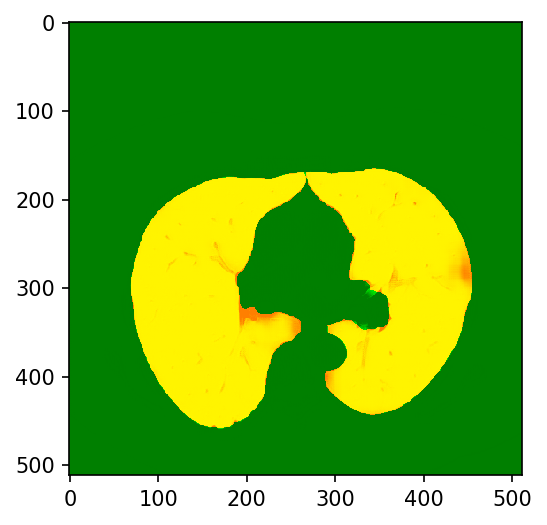

In [20]:
pid = l_all_pid[600]

ct_slice = np.squeeze(h5_test[pid]["ct_slice"][()])
mask = np.squeeze(h5_test[pid]["mask"][()])
pmap = np.squeeze(h5_output[pid]["pmap"][()])
dice = h5_output[pid]["dice"][()]

plt.figure(dpi=150)
plt.imshow(nmlz(ct_slice))

plt.figure(dpi=150)
plt.imshow(overlap_pmaps(nmlz(ct_slice), pmap))

plt.figure(dpi=150)
plt.imshow(pmap)

plt.figure(dpi=150)
plt.imshow(mask)

plt.figure(dpi=150)
plt.imshow(overlap_pmaps(mask, pmap))